In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [53]:
df_India = df[(df['job_country']=='India')&(df['job_title_short'] == 'Data Scientist')]
df_India_count = df_Google_Ind['job_title_short'].count
df_India_count



<bound method Series.count of 118026    Data Scientist
134042    Data Scientist
138744    Data Scientist
233434    Data Scientist
303117    Data Scientist
321813    Data Scientist
367319    Data Scientist
367945    Data Scientist
386242    Data Scientist
433375    Data Scientist
471849    Data Scientist
486629    Data Scientist
488484    Data Scientist
494481    Data Scientist
495644    Data Scientist
499763    Data Scientist
512401    Data Scientist
630206    Data Scientist
674800    Data Scientist
675541    Data Scientist
693842    Data Scientist
709856    Data Scientist
723830    Data Scientist
741415    Data Scientist
Name: job_title_short, dtype: object>

In [52]:
df_Google_Ind = df_India[df_India['company_name'] == 'Google']
df_Google_Ind_pay = df_Google_Ind['salary_year_avg']


ValueError: 2

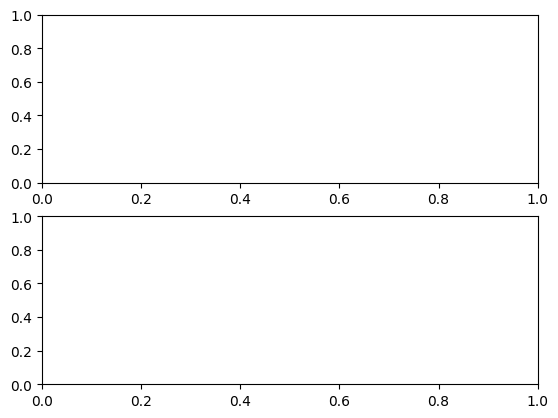

In [55]:
fig, ax = plt.subplots(2, 1)  

sns.barplot(data=df_Google_Ind, x='salary_year_avg', y='job_title_short', hue='df_Google_Ind_pay', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))



sns.barplot(data=df_Google_Ind, x=df_India_count, y=df_Google_Ind.index, hue=df_India_count, ax=ax[1], palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()